In [1]:
from ogeso import multicarrier
from ogeso import plots
import matplotlib.pyplot as plt
import IPython

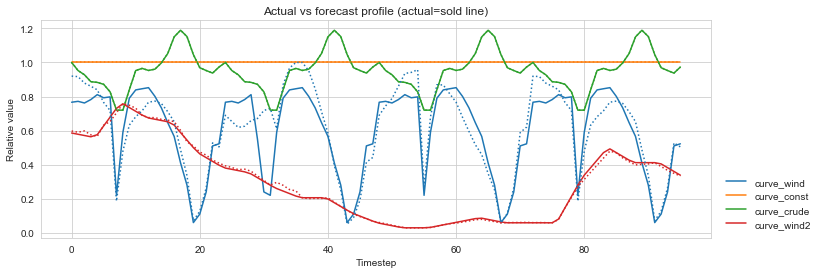

In [2]:
carrier_properties = {
    'gas':{'energy_value':40,
           'Tb_basetemp_K':273+15,
           'Pb_basepressure_MPa':0.101,
           'G_gravity':0.6,
           'rho_density': 0.84, # kg/Sm3
           'Z_compressibility':0.9,
           'export_price':0.419, #$/Sm3
           'k_heat_capacity_ratio':1.27,
           'R_individual_gas_constant': 500, # J/kg K
           'CO2content':2.34},
    'el':{'energy_value':1,
          'CO2content':0},
    'heat':{'CO2content':0},
    }

datafile = "data_example.xlsx"
data,profiles = multicarrier.read_data_from_xlsx(datafile,carrier_properties)

plots.plotProfiles(profiles)

In [8]:
data['paramDevice']['battery']['Emax']=5 # MWh - battery
data['paramDeviceEnergyInitially']['battery']=2.5 # MWh - battery
mc = multicarrier.Multicarrier(loglevel="INFO")
mc.createModelInstance(data,profiles)

#mc.computeEdgePressureDropAtFullPower(P=50)

2020-05-11 11:31:00 INFO: TODO: objective function definition
2020-05-11 11:31:00 INFO: TODO: separator power (eta) and heat (eta2) demand
2020-05-11 11:31:00 INFO: Compressor - output pressure fixed at nominal value?
2020-05-11 11:31:00 INFO: TODO: gas turbine power vs heat output
2020-05-11 11:31:00 INFO: TODO: startup cost
2020-05-11 11:31:00 INFO: TODO: el source: dieselgen, fuel, on-off variables
2020-05-11 11:31:00 INFO: TODO: liquid pump approximation ok?
2020-05-11 11:31:00 INFO: TODO: oil pump pressure difference approximation ok?
2020-05-11 11:31:00 INFO: TODO: flow vs pressure equations for liquid flows


TODO: startup delay does not work with Pmin>0


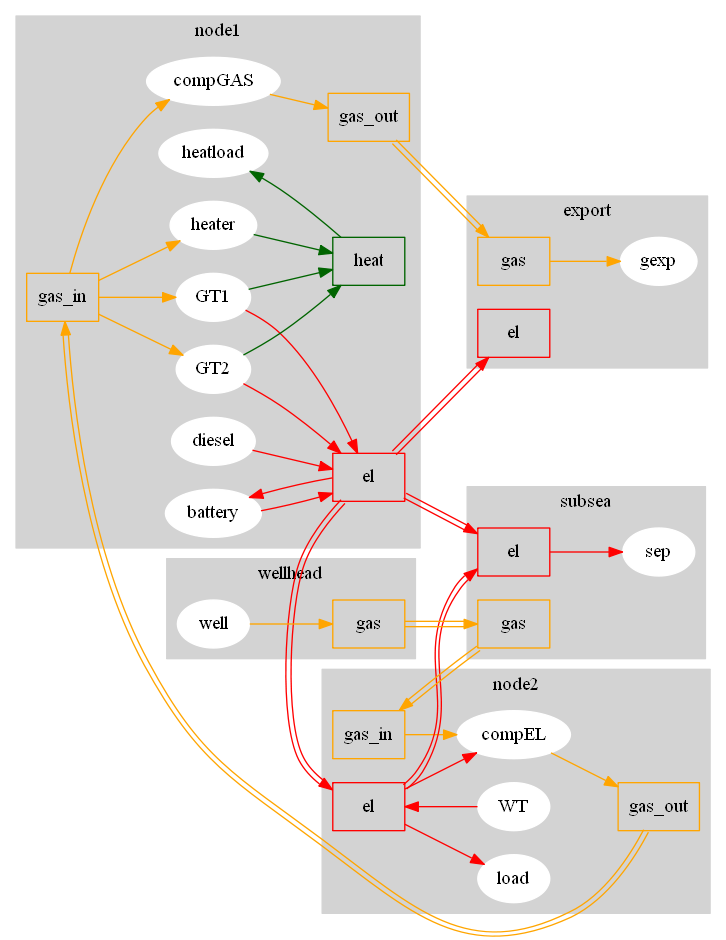

In [5]:
dotG=plots.plotNetwork(mc,timestep=None,filename=None)
#IPython.display.SVG(dotG.create_svg()) #original size, vector graphics
IPython.display.Image(dotG.create_png()) #scales automatically to page width

In [88]:
status = mc.solveMany(solver="cbc",timerange=[0,48],write_yaml=False)

2020-05-11 11:27:29 INFO: Solving timestep=0
2020-05-11 11:27:31 INFO: Solving timestep=4
2020-05-11 11:27:32 INFO: Solving timestep=8
2020-05-11 11:27:33 INFO: Solving timestep=12
2020-05-11 11:27:34 INFO: Solving timestep=16
2020-05-11 11:27:35 INFO: Solving timestep=20
2020-05-11 11:27:35 INFO: Solving timestep=24
2020-05-11 11:27:36 INFO: Solving timestep=28
2020-05-11 11:27:37 INFO: Solving timestep=32
2020-05-11 11:27:38 INFO: Solving timestep=36
2020-05-11 11:27:40 INFO: Solving timestep=40
2020-05-11 11:27:40 INFO: Solving timestep=44


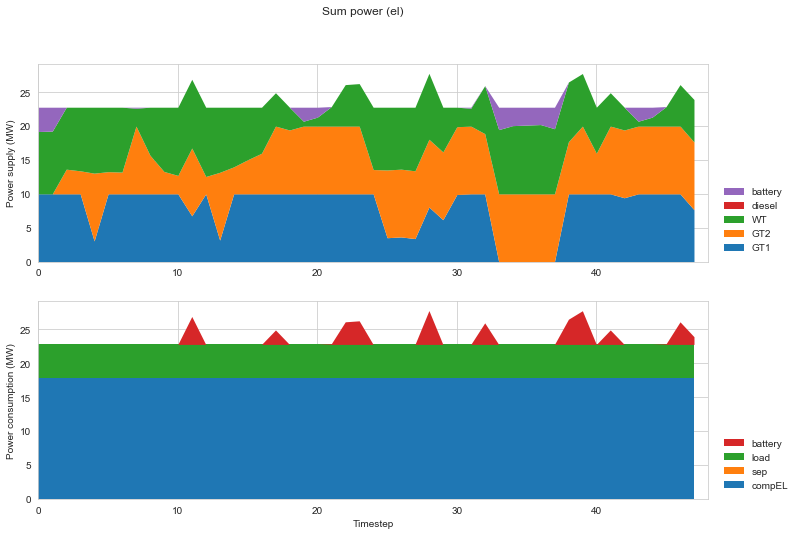

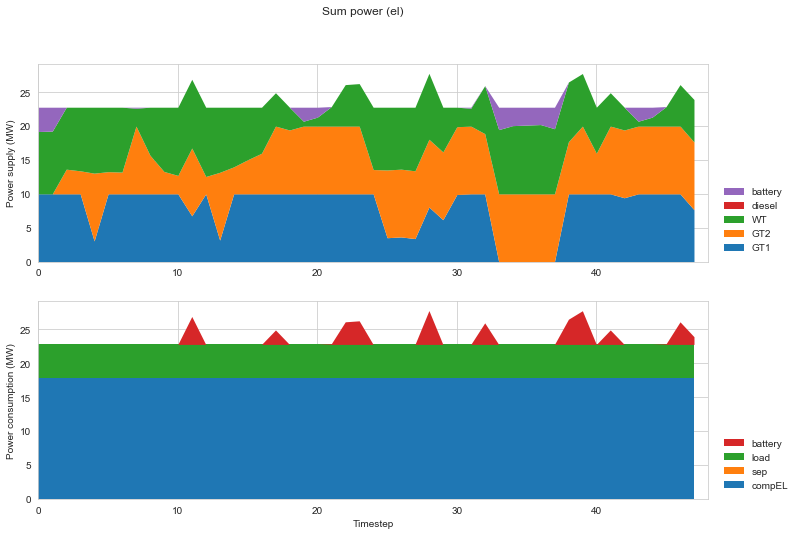

In [83]:
plots.plot_SumPowerMix(mc,carrier="el")

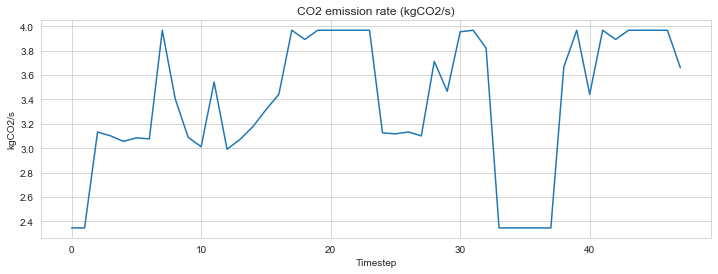

In [86]:
plots.plot_CO2_rate(mc)

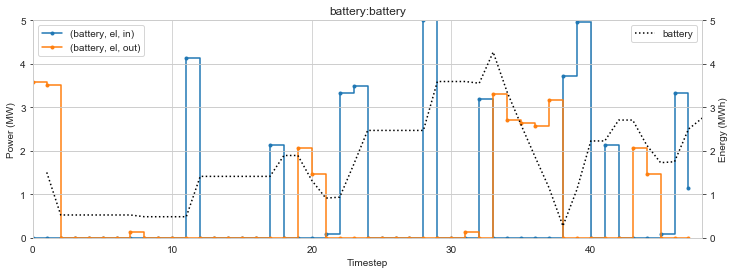

In [87]:
plots.plot_devicePowerEnergy(mc,dev='battery')

In [9]:

mc2 = multicarrier.Multicarrier(loglevel="INFO")
data['paramDevice'][17]['Emax']=0 # MWh - battery
data['paramDeviceEnergyInitially'][17]=0 # MWh - battery
mc2.createModelInstance(data,profiles)
status2 = mc2.solveMany(solver="cbc",time_end=48,write_yaml=False)

2020-01-16 16:25:30 INFO: TODO: objective function definition
2020-01-16 16:25:30 INFO: TODO: gas turbine power vs heat output
2020-01-16 16:25:30 INFO: TODO: startup cost
2020-01-16 16:25:30 INFO: TODO: el source: dieselgen, fuel, on-off variables
2020-01-16 16:25:30 INFO: TODO: el power balance constraint redundant?
2020-01-16 16:25:30 INFO: TODO: gas pressure bounds set by input parameters
2020-01-16 16:25:30 INFO: TODO: solve many data missing
2020-01-16 16:25:30 INFO: Solving timestep=0


TODO: electrical storage objective


2020-01-16 16:25:31 INFO: Solving timestep=4
2020-01-16 16:25:31 INFO: Solving timestep=8
2020-01-16 16:25:32 INFO: Solving timestep=12
2020-01-16 16:25:33 INFO: Solving timestep=16
2020-01-16 16:25:34 INFO: Solving timestep=20
2020-01-16 16:25:35 INFO: Solving timestep=24
2020-01-16 16:25:35 INFO: Solving timestep=28
2020-01-16 16:25:36 INFO: Solving timestep=32
2020-01-16 16:25:36 INFO: Solving timestep=36
2020-01-16 16:25:37 INFO: Solving timestep=40
2020-01-16 16:25:38 INFO: Solving timestep=44


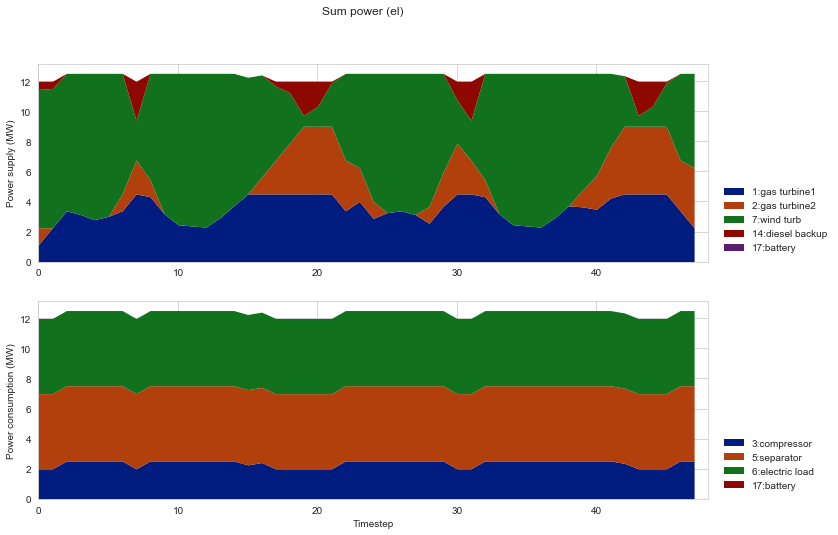

In [10]:
plots.plot_SumPowerMix(mc2,carrier="el")

WITH BATTERY: CO2 average emissions = 96.9173601520837 kgCO2/hour
WITHOUT BATTERY: CO2 average emissions = 102.6886172541665 kgCO2/hour


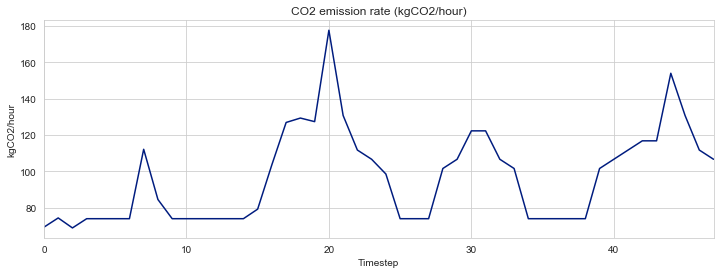

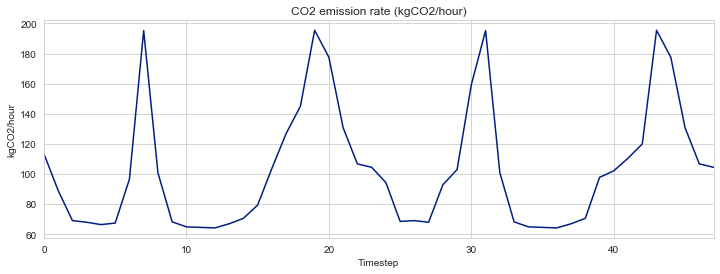

In [11]:
plots.plot_CO2(mc)
print("WITH BATTERY: CO2 average emissions = {} kgCO2/hour".format(mc._dfCO2.mean()))
plots.plot_CO2(mc2)
print("WITHOUT BATTERY: CO2 average emissions = {} kgCO2/hour".format(mc2._dfCO2.mean()))
